## まとめ

機械学習を行うまでのデータの取得、前処理、可視化、加工までを行います。

#### データの取得
- データの読み込み
- データの俯瞰

In [2]:
#　モジュールのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# データの読み込み
data = pd.read_csv("./data/stock_8306.tsv", sep="\t")
data.head()

,date,session,open,high,low,close,volume,value
0,2007-01-04,0,1480000.0,1490000.0,1480000.0,1490000.0,15871,23583080000
1,2007-01-04,1,NaN,NaN,NaN,NaN,0,0
2,2007-01-05,0,1490000.0,1500000.0,1480000.0,1490000.0,19961,29743660000
3,2007-01-05,1,1490000.0,1500000.0,1480000.0,1490000.0,13865,20647740000
4,2007-01-09,0,1480000.0,1510000.0,1480000.0,1510000.0,20420,30480320000


＜データの説明＞  
date:日付  
session:0が前場、1が後場  
open:始値  
high:高値  
low:安値  
close:終値  
volume:取引高（市場で何株取引されたか）  
value:取引高×取引されたタイミングの株価  
  
＜用語説明＞  
前場・後場   
http://www.miller.co.jp/report/wakaru/20110304.html  
４本値（始値・高値・安値・終値）  
http://kabukai.web.fc2.com/chapter03/4honne6.html    

＜本まとめの目的＞  
後場の終値（session=1のclose）から前場の始値（session=0のopen）を引けばある１日において株価が上がったか下がったか分かる。  
前日のデータを説明変数とし、当日株価が上がったか否かを目的変数として、機械学習を行うまでの処理の仕方を習得する。

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5192 entries, 0 to 5191
Data columns (total 8 columns):
date       5192 non-null object
session    5192 non-null int64
open       5179 non-null float64
high       5179 non-null float64
low        5179 non-null float64
close      5179 non-null float64
volume     5192 non-null int64
value      5192 non-null int64
dtypes: float64(4), int64(3), object(1)
memory usage: 324.6+ KB


#### データの前処理 1
- 前場と後場の結合

In [5]:
# 前場の切り出し
zenba = data[data["session"] == 0]
zenba.head()

,date,session,open,high,low,close,volume,value
0,2007-01-04,0,1480000.0,1490000.0,1480000.0,1490000.0,15871,23583080000
2,2007-01-05,0,1490000.0,1500000.0,1480000.0,1490000.0,19961,29743660000
4,2007-01-09,0,1480000.0,1510000.0,1480000.0,1510000.0,20420,30480320000
6,2007-01-10,0,1520000.0,1520000.0,1500000.0,1510000.0,21635,32691090000
8,2007-01-11,0,1490000.0,1500000.0,1480000.0,1500000.0,8337,12434660000


In [6]:
# 後場の切り出し
goba = data[data["session"] == 1]
goba.head()

,date,session,open,high,low,close,volume,value
1,2007-01-04,1,NaN,NaN,NaN,NaN,0,0
3,2007-01-05,1,1490000.0,1500000.0,1480000.0,1490000.0,13865,20647740000
5,2007-01-09,1,1500000.0,1520000.0,1500000.0,1510000.0,17356,26179800000
7,2007-01-10,1,1510000.0,1510000.0,1490000.0,1490000.0,16022,24021850000
9,2007-01-11,1,1490000.0,1500000.0,1470000.0,1470000.0,12766,18902520000


In [7]:
# 結合のための前処理（前場）
del zenba["session"]
print(zenba.columns)
print()

rename_dict = {}
for col in zenba.columns[1:]:
    rename_dict[col] = col + "_zenba"
print(rename_dict)

zenba = zenba.rename(columns=rename_dict)
zenba.head()

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'value'], dtype='object')

{'open': 'open_zenba', 'high': 'high_zenba', 'low': 'low_zenba', 'close': 'close_zenba', 'volume': 'volume_zenba', 'value': 'value_zenba'}


,date,open_zenba,high_zenba,low_zenba,close_zenba,volume_zenba,value_zenba
0,2007-01-04,1480000.0,1490000.0,1480000.0,1490000.0,15871,23583080000
2,2007-01-05,1490000.0,1500000.0,1480000.0,1490000.0,19961,29743660000
4,2007-01-09,1480000.0,1510000.0,1480000.0,1510000.0,20420,30480320000
6,2007-01-10,1520000.0,1520000.0,1500000.0,1510000.0,21635,32691090000
8,2007-01-11,1490000.0,1500000.0,1480000.0,1500000.0,8337,12434660000


In [8]:
rename_dict = {col:col+"_goba" for col in goba.columns[1:]}

In [9]:
# 結合のための前処理（後場）　ディクト内包表記を利用
del goba["session"]
print(goba.columns)
print()

rename_dict = {col:col+"_goba" for col in goba.columns[1:]}
print(rename_dict)

goba = goba.rename(columns=rename_dict)
goba.head()

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'value'], dtype='object')

{'open': 'open_goba', 'high': 'high_goba', 'low': 'low_goba', 'close': 'close_goba', 'volume': 'volume_goba', 'value': 'value_goba'}


,date,open_goba,high_goba,low_goba,close_goba,volume_goba,value_goba
1,2007-01-04,NaN,NaN,NaN,NaN,0,0
3,2007-01-05,1490000.0,1500000.0,1480000.0,1490000.0,13865,20647740000
5,2007-01-09,1500000.0,1520000.0,1500000.0,1510000.0,17356,26179800000
7,2007-01-10,1510000.0,1510000.0,1490000.0,1490000.0,16022,24021850000
9,2007-01-11,1490000.0,1500000.0,1470000.0,1470000.0,12766,18902520000


In [10]:
# 結合
df = zenba.merge(goba, on="date")
df.head()

,date,open_zenba,high_zenba,low_zenba,close_zenba,volume_zenba,value_zenba,open_goba,high_goba,low_goba,close_goba,volume_goba,value_goba
0,2007-01-04,1480000.0,1490000.0,1480000.0,1490000.0,15871,23583080000,NaN,NaN,NaN,NaN,0,0
1,2007-01-05,1490000.0,1500000.0,1480000.0,1490000.0,19961,29743660000,1490000.0,1500000.0,1480000.0,1490000.0,13865,20647740000
2,2007-01-09,1480000.0,1510000.0,1480000.0,1510000.0,20420,30480320000,1500000.0,1520000.0,1500000.0,1510000.0,17356,26179800000
3,2007-01-10,1520000.0,1520000.0,1500000.0,1510000.0,21635,32691090000,1510000.0,1510000.0,1490000.0,1490000.0,16022,24021850000
4,2007-01-11,1490000.0,1500000.0,1480000.0,1500000.0,8337,12434660000,1490000.0,1500000.0,1470000.0,1470000.0,12766,18902520000


#### データの前処理 2
- 欠損データの処理

In [11]:
# 欠損データの確認
df[df.isnull().any(axis=1)]

,date,open_zenba,high_zenba,low_zenba,close_zenba,volume_zenba,value_zenba,open_goba,high_goba,low_goba,close_goba,volume_goba,value_goba
0,2007-01-04,1480000.0,1490000.0,1480000.0,1490000.0,15871,23583080000,NaN,NaN,NaN,NaN,0,0
179,2007-09-25,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0
180,2007-09-26,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0
181,2007-09-27,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0
182,2007-09-28,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0
244,2007-12-28,1060.0,1061.0,1035.0,1047.0,23987500,25048786500,NaN,NaN,NaN,NaN,0,0
245,2008-01-04,1019.0,1021.0,991.0,995.0,33135500,33373456500,NaN,NaN,NaN,NaN,0,0
489,2008-12-30,559.0,561.0,549.0,549.0,31933200,17686657800,NaN,NaN,NaN,NaN,0,0
490,2009-01-05,578.0,579.0,568.0,571.0,37759600,21634629400,NaN,NaN,NaN,NaN,0,0


In [12]:
# 欠損データの除去
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(2596, 13)
(2587, 13)


#### データの前処理 3
- 前場と後場のデータから1日ごとのデータを作成

In [13]:
# １日ごとのデータを作成
df["open"] = df["open_zenba"]
df["high"] = df[["high_zenba", "high_goba"]].max(axis=1)
df["low"] = df[["low_zenba", "low_goba"]].min(axis=1)
df["close"] = df["close_goba"]
df["volume"] = df[["volume_zenba","volume_goba"]].sum(axis=1)
df["value"] = df["value_zenba"] + df["value_goba"] # こちらの方が直感的かも
df.head()

,date,open_zenba,high_zenba,low_zenba,close_zenba,volume_zenba,value_zenba,open_goba,high_goba,low_goba,close_goba,volume_goba,value_goba,open,high,low,close,volume,value
1,2007-01-05,1490000.0,1500000.0,1480000.0,1490000.0,19961,29743660000,1490000.0,1500000.0,1480000.0,1490000.0,13865,20647740000,1490000.0,1500000.0,1480000.0,1490000.0,33826,50391400000
2,2007-01-09,1480000.0,1510000.0,1480000.0,1510000.0,20420,30480320000,1500000.0,1520000.0,1500000.0,1510000.0,17356,26179800000,1480000.0,1520000.0,1480000.0,1510000.0,37776,56660120000
3,2007-01-10,1520000.0,1520000.0,1500000.0,1510000.0,21635,32691090000,1510000.0,1510000.0,1490000.0,1490000.0,16022,24021850000,1520000.0,1520000.0,1490000.0,1490000.0,37657,56712940000
4,2007-01-11,1490000.0,1500000.0,1480000.0,1500000.0,8337,12434660000,1490000.0,1500000.0,1470000.0,1470000.0,12766,18902520000,1490000.0,1500000.0,1470000.0,1470000.0,21103,31337180000
5,2007-01-12,1480000.0,1500000.0,1470000.0,1490000.0,14732,21862390000,1500000.0,1520000.0,1490000.0,1510000.0,22965,34629310000,1480000.0,1520000.0,1470000.0,1510000.0,37697,56491700000


In [14]:
# 適切な列のみ抽出
valid_col = [col for col in df.columns if "zenba" not in col and  "goba" not in col]
print(valid_col)

df = df[valid_col]
df.head()

['date', 'open', 'high', 'low', 'close', 'volume', 'value']


,date,open,high,low,close,volume,value
1,2007-01-05,1490000.0,1500000.0,1480000.0,1490000.0,33826,50391400000
2,2007-01-09,1480000.0,1520000.0,1480000.0,1510000.0,37776,56660120000
3,2007-01-10,1520000.0,1520000.0,1490000.0,1490000.0,37657,56712940000
4,2007-01-11,1490000.0,1500000.0,1470000.0,1470000.0,21103,31337180000
5,2007-01-12,1480000.0,1520000.0,1470000.0,1510000.0,37697,56491700000


#### データの可視化
- 異常値データの処理

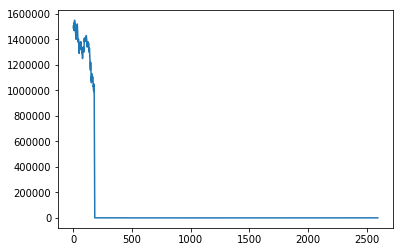

In [15]:
# データを可視化する
plt.plot(df["close"])
plt.show()

(2587, 7)
(2409, 7)


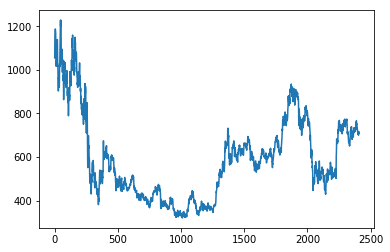

In [17]:
# closeの値が高すぎる期間を除去する
print(df.shape)
df = df[df["close"] < 50000]
df = df.reset_index(drop=True)
print(df.shape)

plt.plot(df["close"])
plt.show()

#### データの加工 1
- ラベル（正解データ）の付与 

In [35]:
print((df["close"] - df["open"]).head())
print()
print((df["close"] - df["open"] > 0).astype(int).head())

y = list((df["close"] - df["open"] > 0).astype(int))
y =  y[1:] + [np.nan]

df["y"] = y
df.tail()

0   -42.0
1    19.0
2    64.0
3    31.0
4    22.0
dtype: float64

0    0
1    1
2    1
3    1
4    1
dtype: int32


,date,open,high,low,close,volume,value,y
2404,2017-07-31,700.8,705.7,699.3,700.0,46416000,32603176600,1.0
2405,2017-08-01,704.0,716.3,702.4,715.4,62118200,44146032120,0.0
2406,2017-08-02,722.0,726.6,716.4,716.8,66346500,47769879450,0.0
2407,2017-08-03,715.5,717.7,708.9,712.8,39341800,28030821070,1.0
2408,2017-08-04,708.2,710.9,707.3,709.2,24620500,17459127260,NaN


In [36]:
print(df.shape)
df = df.dropna()
print(df.shape)
df.head()

(2409, 8)
(2408, 8)


,date,open,high,low,close,volume,value,y
0,2007-10-01,1097.0,1102.0,1041.0,1055.0,58054500,61896864000,1.0
1,2007-10-02,1095.0,1127.0,1080.0,1114.0,72217000,80237887400,1.0
2,2007-10-03,1094.0,1164.0,1094.0,1158.0,86005800,97624094800,1.0
3,2007-10-04,1140.0,1195.0,1139.0,1171.0,64573600,76051647000,1.0
4,2007-10-05,1165.0,1193.0,1164.0,1187.0,43310800,51083482700,0.0


#### データの加工 2
- データを訓練期間とテスト期間に分ける

In [37]:
print(len(df))
threshold = int(len(df) * 0.8)
print(threshold)

2408
1926


In [38]:
X = df[["open", "high", "low", "close", "volume", "value"]]
Y = df[["y"]]

print(X.iloc[:threshold, :].values)
print()
print(Y.iloc[:threshold, :].values)
print()
print(Y.iloc[:threshold, :].values.flatten())
print()

X_train, y_train = X.iloc[:threshold, :].values, Y.iloc[:threshold, :].values.flatten()
X_test, y_test = X.iloc[threshold:, :].values, Y.iloc[threshold:, :].values.flatten()
# X_train = np.array(X.iloc[:threshold, :]) でもOK

print(X_train)
print()
print(y_train)

[[1.09700000e+03 1.10200000e+03 1.04100000e+03 1.05500000e+03
  5.80545000e+07 6.18968640e+10]
 [1.09500000e+03 1.12700000e+03 1.08000000e+03 1.11400000e+03
  7.22170000e+07 8.02378874e+10]
 [1.09400000e+03 1.16400000e+03 1.09400000e+03 1.15800000e+03
  8.60058000e+07 9.76240948e+10]
 ...
 [8.94100000e+02 9.03400000e+02 8.71400000e+02 8.79500000e+02
  8.73489000e+07 7.72403432e+10]
 [8.71400000e+02 8.80000000e+02 8.62000000e+02 8.65700000e+02
  8.21602000e+07 7.13020139e+10]
 [8.65500000e+02 8.73700000e+02 8.60400000e+02 8.64000000e+02
  5.50997000e+07 4.77299007e+10]]

[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]

[1. 1. 1. ... 0. 0. 0.]

[[1.09700000e+03 1.10200000e+03 1.04100000e+03 1.05500000e+03
  5.80545000e+07 6.18968640e+10]
 [1.09500000e+03 1.12700000e+03 1.08000000e+03 1.11400000e+03
  7.22170000e+07 8.02378874e+10]
 [1.09400000e+03 1.16400000e+03 1.09400000e+03 1.15800000e+03
  8.60058000e+07 9.76240948e+10]
 ...
 [8.94100000e+02 9.03400000e+02 8.71400000e+02 8.79500000e+02
  8

#### オマケ
- 機械学習にかけて精度を確認してみる

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9761163032191069
0.5


C:\Users\jfe104671\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
